# Import packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import io

# Target File

In [53]:
leap_imp_f = 'LEAP_Impedance.txt'
leap_spl_f = 'LEAP_SPL.txt'

# Furnish Functions

### Define Curve Object

In [4]:
class curveData:
    def __init__(self, label, note, xdata, ydata):
        self.label = label
        self.note = note
        self.xdata = xdata
        self.ydata = ydata

### Graph Style

In [5]:
x_lim = [20,20000]
y_lim = [0, 30]


def setStyle(myPlotDict):
    for key in myPlotDict.keys():
        ax = myPlotDict[key]
        ax.set_xscale('log')
        ax.set_xlim(auto=True)
        ax.set_ylim(auto=True)
        ax.grid()
        ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

def setAxStyle(ax):
    ax.set_xscale('log')
    ax.set_xlim(auto=True)
    ax.set_ylim(auto=True)
    ax.grid()
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [62]:
dataSequence = {}

def get_leap_file(path):
    with open(path, 'r', encoding='UTF-8', errors='ignore') as file:
        headers = file.readlines()[:11]
        title = path[path.rfind('/')+1:path.rfind('.')] # LEAP_Impedance
        
        if title in dataSequence: pass
        else: dataSequence[title] = []
            
        label = headers[4][headers[4].find('=')+1:]   # Impedance_PR: T201100003660

        units = headers[-1]
        units = units.strip().split(" ")
        units = [x for x in units if x][2:]     # ['Hz', 'Ohm', 'Deg']

        data = pd.read_csv(path,  skiprows=11)
        freq = pd.Series(data.iloc[:,0], name='x', dtype=float)
        val = pd.Series(data.iloc[:,1], name='y', dtype=float)
        phase = pd.Series(data.iloc[:,2], name='y', dtype=float)

        
        curveDatas = []
        note = ""
        curveDatas.append(curveData(label, note, freq, val))
        curveDatas.append(curveData("Phase", note, freq, phase))
        dataSequence[title].extend(curveDatas)


# get_leap_file(leap_spl_f)
get_leap_file(leap_imp_f)
print(dataSequence)

{'LEAP_Impedance': [<__main__.curveData object at 0x00000296D1F14C48>, <__main__.curveData object at 0x00000296D1EF4CC8>]}


In [61]:
def plot(dataSequence):
    for title, cruvesArr in dataSequence.items():
        fig.add_subplot(111)
        myPlotDict[title] = fig.axes[len(fig.axes) - 1]
        for it in cruvesArr:
            if (it.xdata.dtype == float):
                print(title)  
                myPlotDict[title].plot(it.xdata, it.ydata, label=it.label)
    setStyle(myPlotDict)

def plotOne(dataSequence, title, ax):
    for it in dataSequence[title]:
        if (it.xdata.dtype == float):
            ax.plot(it.xdata, it.ydata, label=it.label)
    setAxStyle(ax)

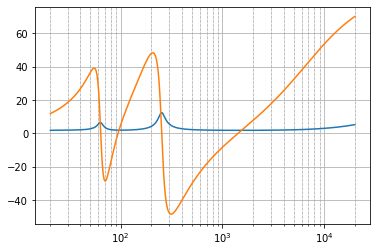

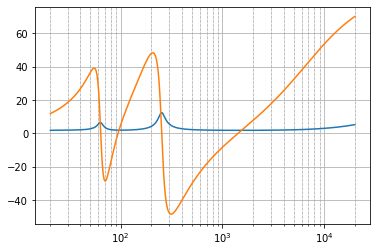

In [64]:
fig_IMP, _ = plt.subplots()
plotOne(dataSequence, "LEAP_Impedance", fig_IMP.axes[0])

fig_IMP

[<matplotlib.lines.Line2D object at 0x00000296D54BDD48>, <matplotlib.lines.Line2D object at 0x00000296D57A65C8>]


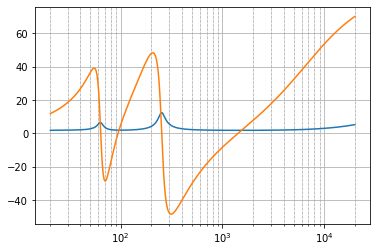

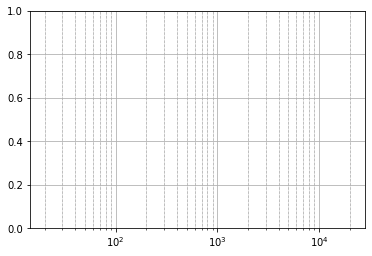

In [91]:
fig_main